## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
YTData = pd.read_csv('GBcomments.csv', error_bad_lines=False)
YTData.head()

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  
0        0  
1        0  
2        0  
3        0  
4        0

## Sentiment Analysis

In [4]:
from textblob import TextBlob

In [5]:
polarity=[]
for i in YTData['comment_text']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0) 

In [6]:
YTData['polarity']=polarity
YTData.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  polarity  
0        0      0.45  
1        0      0.00  
2        0      0.00  
3        0      0.00  
4        0      1.00

## Word Cloud Representation of Sentiments

In [7]:
comments_positive=YTData[YTData['polarity']==1]
comments_positive.head()

video_id                                       comment_text  likes  \
4    jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
26   jt2OHQh0HoQ            The best thing to ever happen to iPhone      0   
80   jt2OHQh0HoQ  Apple is always awesome \n\nhttps://youtu.be/r...      0   
158  YPVcg45W0z4  das a lot of edditing you have done there ... ...      0   
175  YPVcg45W0z4                        Welcome to the Scandiworld!      0   

     replies  polarity  
4          0       1.0  
26         2       1.0  
80         1       1.0  
158        0       1.0  
175        0       1.0

In [8]:
from wordcloud import WordCloud,STOPWORDS

In [9]:
total_comments=(' '.join(comments_positive['comment_text']))
len(total_comments)

910364

(-0.5, 999.5, 499.5, -0.5)

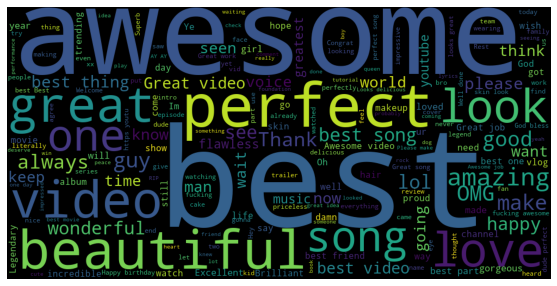

In [10]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [11]:
comments_negative=YTData[YTData['polarity']==-1]
comments_negative.head()

video_id                                       comment_text  likes  \
1387  ql0Op1VcELw                                             boring      0   
1394  ql0Op1VcELw                  0:22   **laughs at terrible pun**      1   
1530  -Ifnaxi2LQg          this is the worst thing i've heard. ever.      0   
1745  F2uJvwiSZAQ  People making jokes about 9/11 is truly disgus...      1   
1793  F2uJvwiSZAQ                                      Thats insane.      0   

      replies  polarity  
1387        0      -1.0  
1394        1      -1.0  
1530        0      -1.0  
1745        0      -1.0  
1793        0      -1.0

In [12]:
total_comments=(' '.join(comments_negative['comment_text']))
len(total_comments)

182494

(-0.5, 999.5, 499.5, -0.5)

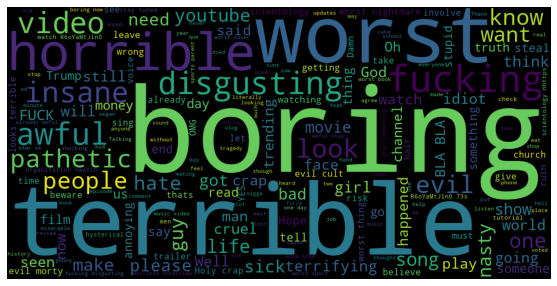

In [13]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

## Analyzing Trending Tags 

In [14]:
YTData2 = pd.read_csv('GBvideos.csv', error_bad_lines=False)
YTData2.head()

b'Skipping line 2398: expected 11 fields, saw 21\nSkipping line 2797: expected 11 fields, saw 21\n'


video_id                                              title  \
0  jt2OHQh0HoQ  Live Apple Event - Apple September Event 2017 ...   
1  AqokkXoa7uE  Holly and Phillip Meet Samantha the Sex Robot ...   
2  YPVcg45W0z4                    My DNA Test Results! I'm WHAT?!   
3  T_PuZBdT2iM  getting into a conversation in a language you ...   
4  NsjsmgmbCfc                               Baby Name Challenge!   

       channel_title  category_id  \
0        Apple Event           28   
1       This Morning           24   
2       emmablackery           24   
3              ProZD            1   
4  Sprinkleofglitter           26   

                                                tags    views  likes  \
0  apple events|apple event|iphone 8|iphone x|iph...  7426393  78240   
1  this morning|interview|holly willoughby|philli...   494203   2651   
2  emmablackery|emma blackery|emma|blackery|briti...   142819  13119   
3  skit|korean|language|conversation|esl|japanese...  1580028  65729   
4  sprinkleofglitter|sprinkle of glitter|baby gli...    40592   5019   

   dislikes  comment_total                                     thumbnail_link  \
0     13548            705  https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...   
1      1309              0     https://i.ytimg.com/vi/AqokkXoa7uE/default.jpg   
2       151           1141     https://i.ytimg.com/vi/YPVcg45W0z4/default.jpg   
3      1529           3598     https://i.ytimg.com/vi/T_PuZBdT2iM/default.jpg   
4        57            490     https://i.ytimg.com/vi/NsjsmgmbCfc/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

In [15]:
tags_complete= (' '.join(YTData2['tags'])) 

In [16]:
YTData2['tags'][0]

'apple events|apple event|iphone 8|iphone x|iphone 8 plus|iphone 7s|iphone 7s plus|ios 11'

In [17]:
import re
tags=re.sub('[^a-zA-Z]',' ',tags_complete)
tags

'apple events apple event iphone   iphone x iphone   plus iphone  s iphone  s plus ios    this morning interview holly willoughby phillip schofield ruth langsford eamonn holmes chat shows   topic chat show   topic talk shows   topic sex robot samantha real life emmablackery emma blackery emma blackery british vlogger british youtuber female vlogger birdyboots dna test   andme ancestry skit korean language conversation esl japanese foreign communication don t speak struggle foreigner lotte mart korea south weather good tutorial sprinkleofglitter sprinkle of glitter baby glitter Louise Pentland Louise Pentland Baby Name Mrs Meldrum Baby Names Nice baby names Unusual baby names Rio Ferdinand Rio Ferdinand   Magazine   Mag      Rio Ferdinand Rio Ferdinand interview football soccer interview Manchester United Man United fifa    fut    fut fifa ratings fifa    ratings chelsea chelsea fc chelsea f c David Luiz Eden Hazard Christensen Premier League Champions League Fifa   Hazard Fifa    David

In [18]:
tags=re.sub(' +',' ',tags)
tags

'apple events apple event iphone iphone x iphone plus iphone s iphone s plus ios this morning interview holly willoughby phillip schofield ruth langsford eamonn holmes chat shows topic chat show topic talk shows topic sex robot samantha real life emmablackery emma blackery emma blackery british vlogger british youtuber female vlogger birdyboots dna test andme ancestry skit korean language conversation esl japanese foreign communication don t speak struggle foreigner lotte mart korea south weather good tutorial sprinkleofglitter sprinkle of glitter baby glitter Louise Pentland Louise Pentland Baby Name Mrs Meldrum Baby Names Nice baby names Unusual baby names Rio Ferdinand Rio Ferdinand Magazine Mag Rio Ferdinand Rio Ferdinand interview football soccer interview Manchester United Man United fifa fut fut fifa ratings fifa ratings chelsea chelsea fc chelsea f c David Luiz Eden Hazard Christensen Premier League Champions League Fifa Hazard Fifa David Luiz Fifa Christensen Fifa Chelsea Fifa

(-0.5, 999.5, 499.5, -0.5)

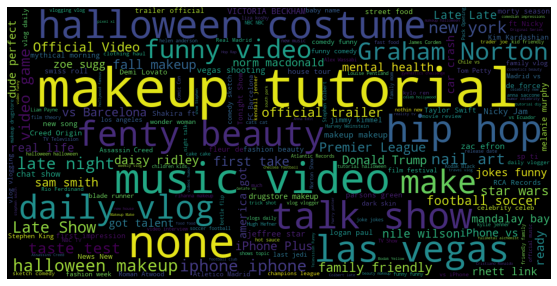

In [19]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

## Linear Regression Plot

Text(0.5, 1.0, 'Regression plot for likes vs views')

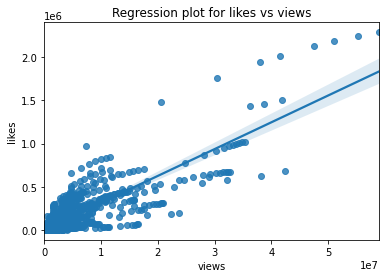

In [20]:
sns.regplot(data=YTData2,x='views',y='likes')
plt.title('Regression plot for likes vs views')

Text(0.5, 1.0, 'Regression plot for dislikes vs views')

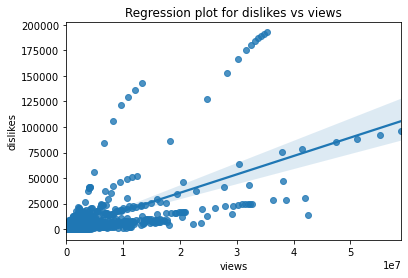

In [21]:
sns.regplot(data=YTData2,x='views',y='dislikes')
plt.title('Regression plot for dislikes vs views')

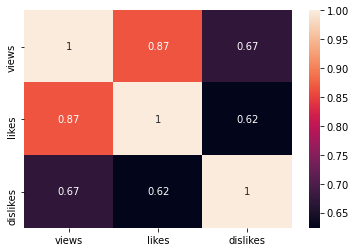

In [22]:
df_corr = YTData2[['views','likes','dislikes']]
sns.heatmap(df_corr.corr(),annot=True)

In [23]:
df_corr.head()

views  likes  dislikes
0  7426393  78240     13548
1   494203   2651      1309
2   142819  13119       151
3  1580028  65729      1529
4    40592   5019        57

## Emoji Analysis

In [24]:
YTData.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  polarity  
0        0      0.45  
1        0      0.00  
2        0      0.00  
3        0      0.00  
4        0      1.00

In [25]:
YTData['comment_text'].isna().sum()

28

In [26]:
len(YTData['comment_text'])

718452

In [27]:
YTData['comment_text'][1]

'To be there with a samsung phone\\n😂😂😂'

In [28]:
import emoji
comment = 'To be there with a samsung phone\\n😂😂😂'
[c for c in comment if c in emoji.UNICODE_EMOJI]

['😂', '😂', '😂']

In [30]:
str=''
for i in YTData['comment_text']:
    list=[c for c in [i] if c in emoji.UNICODE_EMOJI]
    for ele in list:
        str=str+ele

In [31]:
print(str)

🖤😂💄😞😍❤️😒👎🏽❤🍺🌞💛😍💕💦👌🎈🤴🏻😻💄😕☺❤️💗🇩🇰👍🇧🇷😴👌🏻👍👀🙏🏽❤🆗😂🌞😝❤😒👎🏽🍺😂💛😍🎈❤️☺❤❤️💗💗🇧🇷👍👍👍❤👍😃😂👍👍🎢🆗🌞🙄👍😍❤❤❤️🍺😂😂💕💛👍💙😍❤️😍❤👍❤️👍🏾😍❤😍✋😢❤️😍😂😂👌🔥👋❤❤❤️🆗🔥❤👍💚♥👍🔥🍺😂💕💛🎶👍💿❤️😂🌊👍🏾👁😷❤😂✋👌🏾👍😍🔥😢😂👍❤❣️🐝👍😎💕🤘🏻❤☺🆗👌🏽❤😱♥💑🎆💕🍺🎈🎈😍❤❤💞🌊😂👁🎈🎈🎈😂😍✋❤😕😂💯😂❤☺💕♥️🆗❤️❤️💑🍺♥💙❤️♥️😍😍🤖🎈😄😦🎈🎈🎈🎈🎈🎈😂✋❤️❤💯😕😍😐😆👎💖🔥❤☺😂👌💟😌💕🆗❤❤️❤️🙄😂❤️💗❤🌌👍❤💖👍👍😄😦😂🎈❤️✋😆🤣😂😴❤❤👎👎😍❤️♥☺😂😌💟💕🔥🇧🇷🔥❤😢🤔🇦🇷🎆🙄😂❤💖👍😭💛💟🔥😍😍😱🔥😐😄💔👍😄😦😥😆🎈♥😯😂👎❤😂🤣🙄👍🏾😂❤️❤️😍😢😭😞❤️🙄😂❤👍💖💛😍😍😱🔥👑😦👍🎈❤💞❤😍😆😂🤣💔❤️💔😁😔💖👍🏻🇫🇷♥👌😍🔥💕💖💜🎈🎈🐐🐐🐐😍💙❤️💗❤️👍🏾❤️🐽♥😩😭❤️♥️😂♥👍💖💜💙😱🔥🇧🇷😉😍😱❤️💟😍💜🐐💯💖💜👌💜💕🎈🎈💗💙😍❤️❤🙌🔥👌😭😭❤️🐽♥️😂🐨👍💖♥♥️❤️❤️😑🐐🐐♥💋♥️😪😍😍❤😘🤙🏻❄️😆👍💕💗🎈🎈💙👍🙌❤💞😍👍🏽👌💜🙌😕😢😍🐽♥️👍💖😂😍👦🏽❤♥️😲❤️😭🐐🍻😻❤️❤️❣😘💕🎈😨❤💗😍👍🙌👍🏽👌♥😍❣♥️💜🕊😭❤🐽😍♥️💜😂👦🏽👍😃😍❤😱😂😂😲😁👌💯❤️❤❤💕❤👍❤🖤❤👍❤🐐🐐😇🎈😘😨💗❤👍👍🏽👌♥😍🔥💝❤🔥💕👍😂😂😍😢❤😎💜😍👌✔💯🥇❤❤️💗❤️❤👍😭❤💔❤🙋💕😍😢👍❤🐐🐐🎈💞😘❤️❤💗👍😍💗🤙🏻♥❤❤️💕😂❤🔥♥💜👍🙄😂❤😂🚀👍😢👌✔🥇😎💯🐍❤️😔❤❤😭💕❤🎈😍🕳❤️😮🤔💗😍❤️💖🤣😂😂❤️😍💗❤🙌💕♥💜😂🚀💪🏽👍😂💀🏳️‍🌈❤️😎✔😂👍💯🥇🐍😗💩😐🕶👃😂❤😂💚😍❤️💘❤️❤️🤣😂💕🙌🏽🙌🇧🇷😍❤💗❤😂💙😍🚀💪🏽😭👋😍❤️🏳️‍🌈🇧🇷😂❤️✔️😔👍👏😂😺❤️💓💜❤✊❤️😍😝🤣😂❤️💕❤🙌🏽🙌😍💗❤😂❤💙🚀💪🏽👋❤️😍😂❤️👍👍😂😭👏👍❤😢👍😺🐱👍💜❤❤❤️😍❤️❤😝🤣😂❤️💙❤💕😍🙌🏽🙌💗❤💕👌🗣🚀👋💪🏽😍🙌👆😢🥁👍🙁🍈🤣😍💩😀❤💕❤❤😂😭😈❤️🇦🇱😢👍❤👍😺🐱🇧🇷👍❤😂👍👍😍❤️😝💙🤣😂❤️💕🙌🏽🙌😍💔🍨😢🥁😂🐢❤🙁😔🤣💩🔥😻💝🌹❤😂😍😥❤️😢💜😂👍😭💞😺🐱❤👍👍😮😍😍👍😝💓🤣❤️😐❤️💛👍❤️😎🏴😭🔥😱🥁🐢😔🙁🤣👍😻💩👍❤️🌹💝❤😂👍😍😥❤️👍💜😍😂😭🤧😺🐱😎😁😌☠️😀🙏🏴😎💖🤗🔥❤️😍💙😂🥁❤️😔🙁❤👀👏🏾👍💩😆🤣

In [32]:
len(str)

1744

In [33]:
res = {i : str.count(i) for i in set(str)} 
res

{'🕶': 1,
 '🔑': 1,
 '🌌': 1,
 '😐': 5,
 '😩': 1,
 '🇫': 2,
 '☺': 8,
 '🧢': 1,
 '🤣': 13,
 '🐡': 3,
 '😄': 5,
 '🤡': 2,
 '💘': 3,
 '😃': 2,
 '☹': 1,
 '🏔': 4,
 '🐽': 4,
 '😕': 4,
 '✋': 6,
 '🍆': 2,
 '🍻': 1,
 '👻': 5,
 '🖕': 8,
 '🇧': 7,
 '🦄': 2,
 '😌': 3,
 '😲': 2,
 '👽': 1,
 '🤴': 1,
 '🤢': 5,
 '😶': 6,
 '❤': 316,
 '😘': 7,
 '😋': 6,
 '🖤': 4,
 '🤑': 2,
 '😂': 109,
 '🐦': 1,
 '🐍': 2,
 '😎': 9,
 '🐢': 3,
 '🙃': 2,
 '🌴': 5,
 '😆': 7,
 '😭': 18,
 '🎆': 2,
 '🙌': 22,
 '😮': 3,
 '🌋': 4,
 '🍝': 2,
 '😀': 11,
 '😞': 2,
 '🏳': 2,
 '😍': 87,
 '🇦': 2,
 '🌞': 3,
 '😨': 2,
 '👋': 4,
 '😯': 1,
 '💄': 2,
 '🥁': 4,
 '🕊': 1,
 '✔': 4,
 '☠': 1,
 '😥': 4,
 '🤧': 1,
 '😺': 5,
 '🥇': 3,
 '👃': 1,
 '🗣': 1,
 '🏼': 4,
 '🤓': 1,
 '💀': 1,
 '💩': 7,
 '👆': 1,
 '😱': 8,
 '🏾': 16,
 '🐱': 5,
 '❓': 4,
 '💛': 9,
 '🌊': 2,
 '😵': 1,
 '🐉': 1,
 '👌': 19,
 '💔': 6,
 '💋': 3,
 '😁': 3,
 '😑': 1,
 '🕳': 1,
 '✊': 4,
 '😉': 2,
 '💓': 4,
 '\u200d': 3,
 '💯': 9,
 '🅱': 1,
 '💟': 7,
 '😝': 5,
 '🆗': 6,
 '😈': 1,
 '🇩': 1,
 '🤙': 3,
 '🍪': 2,
 '🙊': 1,
 '♥': 45,
 '😊': 7,
 '🤖': 1,
 '😒': 4,
 '😪': 1,
 '🌹': 12,
 

In [34]:
res={k: v for k, v in sorted(res.items(), key=lambda item: item[1])}
res

{'🕶': 1,
 '🔑': 1,
 '🌌': 1,
 '😩': 1,
 '🧢': 1,
 '☹': 1,
 '🍻': 1,
 '👽': 1,
 '🤴': 1,
 '🐦': 1,
 '😯': 1,
 '🕊': 1,
 '☠': 1,
 '🤧': 1,
 '👃': 1,
 '🗣': 1,
 '🤓': 1,
 '💀': 1,
 '👆': 1,
 '😵': 1,
 '🐉': 1,
 '😑': 1,
 '🕳': 1,
 '🅱': 1,
 '😈': 1,
 '🇩': 1,
 '🙊': 1,
 '🤖': 1,
 '😪': 1,
 '🍈': 1,
 '👨': 1,
 '🎣': 1,
 '🙋': 1,
 '💦': 1,
 '🎶': 1,
 '🔜': 1,
 '🍨': 1,
 '🦌': 1,
 '🤞': 1,
 '🇰': 1,
 '❄': 1,
 '😏': 1,
 '🐨': 1,
 '🔧': 1,
 '🌬': 1,
 '🐭': 1,
 '🇱': 1,
 '😇': 1,
 '🎢': 1,
 '😗': 1,
 '🇫': 2,
 '🤡': 2,
 '😃': 2,
 '🍆': 2,
 '🦄': 2,
 '😲': 2,
 '🤑': 2,
 '🐍': 2,
 '🙃': 2,
 '🎆': 2,
 '🍝': 2,
 '😞': 2,
 '🏳': 2,
 '🇦': 2,
 '😨': 2,
 '💄': 2,
 '🌊': 2,
 '😉': 2,
 '🍪': 2,
 '🎱': 2,
 '👦': 2,
 '🌈': 2,
 '💿': 2,
 '👁': 2,
 '👑': 2,
 '🐙': 2,
 '😴': 2,
 '💑': 2,
 '🐝': 2,
 '😷': 2,
 '🤠': 2,
 '🐡': 3,
 '💘': 3,
 '😌': 3,
 '🐢': 3,
 '😮': 3,
 '🌞': 3,
 '🥇': 3,
 '💋': 3,
 '😁': 3,
 '\u200d': 3,
 '🤙': 3,
 '🌇': 3,
 '🤗': 3,
 '🙏': 3,
 '☄': 3,
 '🤘': 3,
 '❣': 3,
 '💝': 3,
 '🏔': 4,
 '🐽': 4,
 '😕': 4,
 '🖤': 4,
 '🌋': 4,
 '👋': 4,
 '🥁': 4,
 '✔': 4,
 '😥': 4,
 '🏼': 4,
 '❓': 4,
 '✊':

In [35]:
keys=[*res.keys()]
values=[*res.values()]

In [36]:
df = pd.DataFrame({'chars':keys[-20:], 'num':values[-20:]})
df

chars  num
0      🐐   15
1      🏾   16
2      😢   16
3      😭   18
4      🏽   18
5      👌   19
6      💗   20
7      🙌   22
8      💙   25
9      💜   27
10     🎈   28
11     💖   29
12     💕   41
13     ♥   45
14     🔥   53
15     😍   87
16     👍  101
17     😂  109
18     ️  185
19     ❤  316

In [37]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [38]:
trace=go.Bar(x = df['chars'],
             y = df['num']
            )
iplot([trace])                      